In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [3]:
rlanders = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])
rlanders.Gender = rlanders.Gender.astype('category')
likert_scale = CategoricalDtype(categories=[1,2,3,4,5], ordered=True)
rlanders.Survey = rlanders.Survey.astype(likert_scale)
# rlanders.info()
# rlanders.Survey.dtype

## Contingency tables and visualisation techniques

In [3]:
pd.crosstab(rlanders.Survey, rlanders.Gender, margins=True)

Gender,Female,Male,All
Survey,,,
1,0,4,4
2,17,45,62
3,23,91,114
4,12,53,65
5,0,5,5
All,52,198,250


In [ ]:
sns.catplot(data=rlanders, x='Survey', hue='Gender', kind='count')

| Cramér's V | Interpretation          |
| :---:      | :---                    |
| 0          | No association          |
| 0.1        | Weak association        |
| 0.25       | Moderate association    |
| 0.50       | Strong association      |
| 0.75       | Very strong association |
| 1          | Complete association    |

## The chi-squared test for independence

1. Formulate the hypotheses:
   - $H_0$: There is no association between the variables (the differences between observed and expected values are small)
   - $H_1$: There is an association between the variables (the differences are large)
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (r-1) \times (k-1)$):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In [4]:
observed = pd.crosstab(rlanders.Survey, rlanders.Gender)
alpha = .05
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 4.2555
Degrees of freedom: 4
P-value           : 0.3725


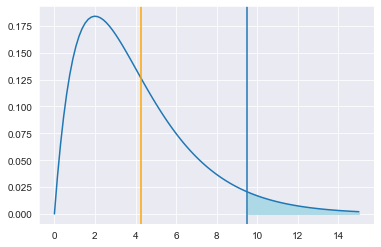

In [5]:
# Is there an association between Gender and Survey?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=df)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

In [6]:
# Calculate critical value
g = stats.chi2.isf(alpha, df = df)
print("Critical value     : %.4f" % g)

Critical value     : 9.4877


## Goodness-of-fit test

In [7]:
types =               ['mutant', 'human', 'alien', 'god', 'demon']
observed =   np.array([   127,      75,      98,     27,     73])
expected_p = np.array([   .35,     .17,     .23,    .08,    .17])

1. Formulate the hypotheses:
   - $H_0$: The sample is representative of the population, i.e. the frequency of each class within the sample corresponds well to that in the population.
   - $H_1$: The sample is *not* representative of the population, i.e. the differences with the expected frequencies are too large.
2. Choose significance level $\alpha$
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (k-1)$ with $k$ the number of categories in the sample):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In [8]:
alpha = 0.05               # Significance level
n = sum(observed)          # Sample size
k = len(observed)          # Number of categories
dof = k - 1                # Degrees of freedom
expected = expected_p * n  # Expected absolute frequencies in the sample
g = stats.chi2.isf(alpha, df=dof)  # Critical value
chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)
print("Significance level  ⍺ = %.2f" % alpha)
print("Sample size         n = %d" % n)
print("k = %d; df = %d" % (k, dof))
print("Chi-squared        χ² = %.4f" % chi2)
print("Critical value      g = %.4f" % g)
print("p-value             p = %.4f" % p)

Significance level  ⍺ = 0.05
Sample size         n = 400
k = 5; df = 4
Chi-squared        χ² = 3.4679
Critical value      g = 9.4877
p-value             p = 0.4828


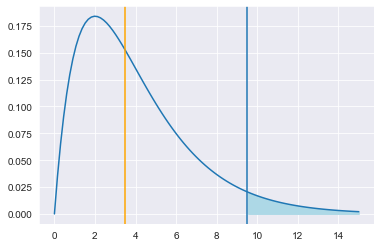

In [9]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

## Standardised residuals

In [10]:
families = pd.DataFrame(
    np.array(
        [[0,  58],
         [1, 149],
         [2, 305],
         [3, 303],
         [4, 162],
         [5,  45]]),
    columns=['num_boys', "observed"])
families.set_index(['num_boys'])
n = families.observed.sum() # sample size

In [11]:
from scipy.special import binom # binomial-function

# probability for a boy
prob_boy = .5
# Add new colum to the data frame for the expected percentages
families['expected_p'] = binom(5, families.num_boys) * prob_boy**families.num_boys * prob_boy**(5-families.num_boys)
# Expected absolute frequencies in the sample:
families['expected'] = families['expected_p'] * n
families

,num_boys,observed,expected_p,expected
0,0,58,0.03125,31.9375
1,1,149,0.15625,159.6875
2,2,305,0.31250,319.3750
3,3,303,0.31250,319.3750
4,4,162,0.15625,159.6875
5,5,45,0.03125,31.9375


1. Formulate the hypotheses:
   - $H_0$: The sample is representative for the population.
   - $H_1$: The sample is *not* representative of the population.
2. Determine $\alpha$ and n
3. Calculate the value of the test statistic in the sample (here: $\chi^2$).
4. Use one of the following methods (based on the degrees of freedom $df = (k-1)$ with $k$ the number of categories in the sample):
   1. Determine critical value $g$ so $P(\chi^2 > g) = \alpha$
   2. Calculate the $p$-value
5. Draw a conclusion based on the outcome:
   1. $\chi^2 < g$: do not reject $H_0$; $\chi^2 > g$: reject $H_0$
   2. $p > \alpha$: do not reject $H_0$; $p < \alpha$: reject $H_0$

In [12]:
alpha=0.01                         # significance level
dof=len(families)-1                # degrees of freedom
g = stats.chi2.isf(alpha, df=dof)  # Critical value
# Perform Chi-squared test, calculate χ² and p
chi2, p = stats.chisquare(f_obs=families.observed, f_exp=families.expected)

print("Chi-squared   χ² = %.4f" % chi2)
print("Critical value g = %.4f" % g)
print("p-value        p = %f"   % p)

Chi-squared   χ² = 28.8462
Critical value g = 15.0863
p-value        p = 0.000025


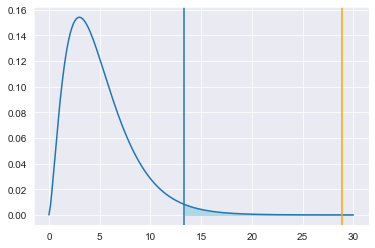

In [13]:
# x-values:
x = np.linspace(0, 30, num=200)
# probability density of the chi-squared distribution
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 1%:
q = stats.chi2.isf(alpha, df=4)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

In [14]:
# standardised residuals
families['stdres'] = (families.observed - families.expected) / np.sqrt(families.expected * (1 - families.expected_p))
families

,num_boys,observed,expected_p,expected,stdres
0,0,58,0.03125,31.9375,4.685541
1,1,149,0.15625,159.6875,-0.920733
2,2,305,0.31250,319.3750,-0.970110
3,3,303,0.31250,319.3750,-1.105082
4,4,162,0.15625,159.6875,0.199223
5,5,45,0.03125,31.9375,2.348389


## Cochran's rule

A chi-squared test can only give good results if you have enough observations in each category. The statistician Cochran (1954) formulated a rule of thumb to determine what exactly *enough* is on contingency tables larger than 2x2:

- All expected values must be at least 1
- At most 20% of the expected values may be smaller than 5